In [1]:
import pandas as pd

Import pandas for data analysis and import csv file setting index as column 0

In [2]:
df = pd.read_csv ('data/Data1.csv', index_col = 0)
df

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


convert index to a datetime

In [3]:
df.index = pd.to_datetime(df.index) 
df

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Import matplotlib and seaborn for plotting

Plot columns as timeseries

/home/artur/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


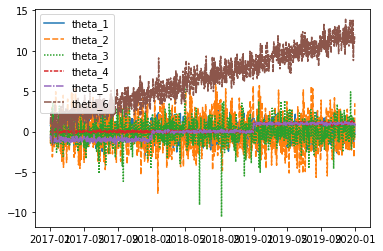

In [5]:
ax = sns.lineplot(data=df)

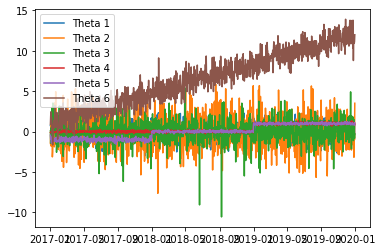

In [6]:
plt.plot(df.index,df)
plt.legend(["Theta 1", "Theta 2", "Theta 3", "Theta 4", "Theta 5", "Theta 6"])
plt.show()

Melt data and plot histograms of all thetas

In [7]:
df_melt = df.melt()
df_melt

,variable,value
0,theta_1,0.756936
1,theta_1,0.767089
2,theta_1,0.404544
3,theta_1,1.313957
4,theta_1,0.209862
...,...,...
6565,theta_6,11.755980
6566,theta_6,11.397092
6567,theta_6,10.918941
6568,theta_6,11.140722


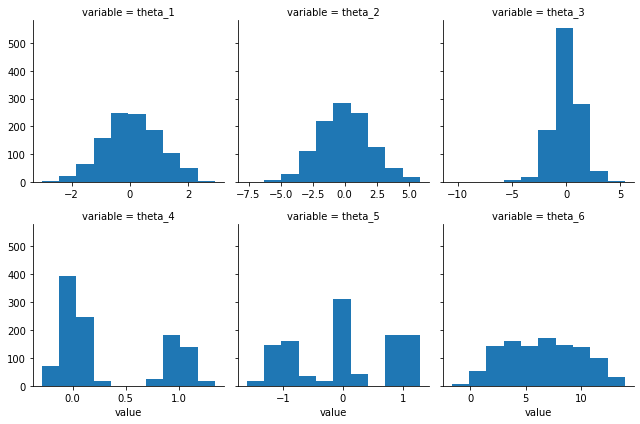

In [8]:
g = sns.FacetGrid(df_melt, col="variable", col_wrap=3, sharex=False)

g = g.map(plt.hist, "value")

Plot kernel destiny estimators

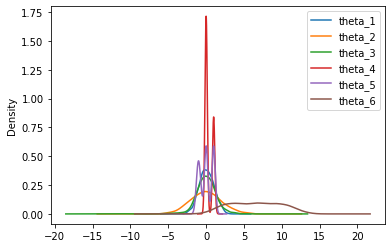

In [9]:
df.plot.kde()

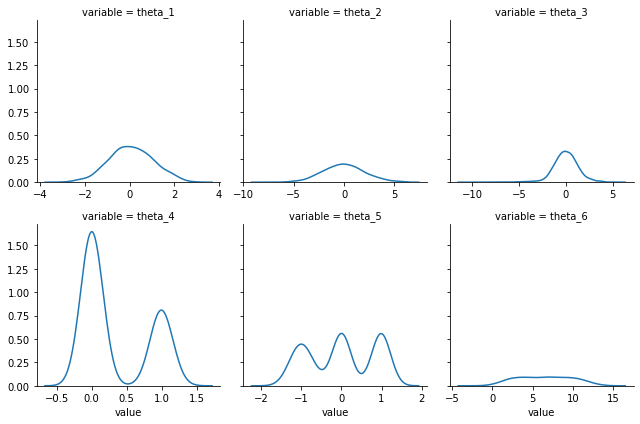

In [10]:
l = sns.FacetGrid(df_melt, col="variable", col_wrap=3, sharex=False)

l = l.map(sns.kdeplot, "value")

Repeat all the process for a new dataframe ($\theta_1 - \theta_4$ in 2018)

In [11]:
df_2018 = df.loc['2018-01-01':'2018-12-31','theta_1':'theta_4']
df_2018.head()

,theta_1,theta_2,theta_3,theta_4
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025


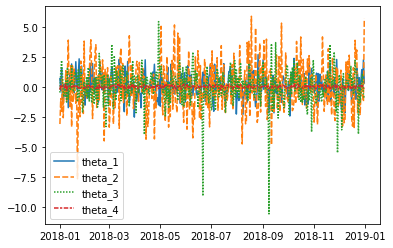

In [12]:
ax = sns.lineplot(data=df_2018)

In [13]:
df_melt_2018 = df_2018.melt()
df_melt_2018

,variable,value
0,theta_1,0.682693
1,theta_1,-0.283107
2,theta_1,1.572221
3,theta_1,-1.042981
4,theta_1,-1.392614
...,...,...
1455,theta_4,0.076798
1456,theta_4,0.028891
1457,theta_4,0.111482
1458,theta_4,-0.080878


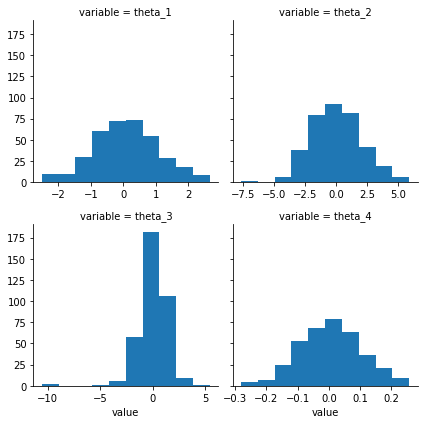

In [14]:
g = sns.FacetGrid(df_melt_2018, col="variable", col_wrap=2, sharex=False)

g = g.map(plt.hist, "value")

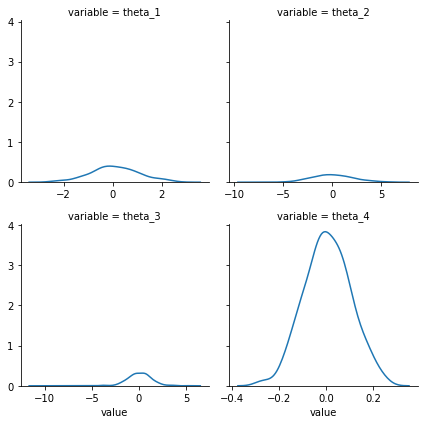

In [15]:
l = sns.FacetGrid(df_melt_2018, col="variable", col_wrap=2, sharex=False)

l = l.map(sns.kdeplot, "value")